<a href="https://colab.research.google.com/github/sayandeepmaity/vseven_lumi/blob/main/guntype_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training with linear kernel...
Accuracy for linear kernel: 0.75
Classification Report for linear kernel:
              precision    recall  f1-score   support

          ak       0.69      0.73      0.71       371
         m24       0.90      0.76      0.82       295
          m4       0.70      0.76      0.73       309

    accuracy                           0.75       975
   macro avg       0.76      0.75      0.75       975
weighted avg       0.76      0.75      0.75       975



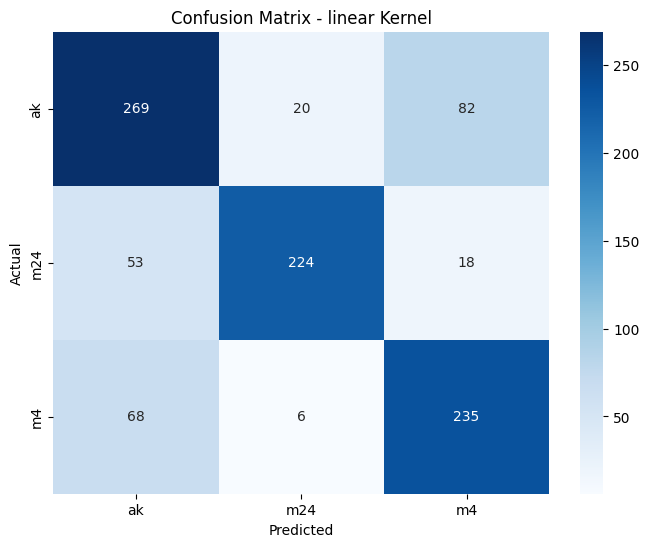

--------------------------------------------------
Training with rbf kernel...
Accuracy for rbf kernel: 0.65
Classification Report for rbf kernel:
              precision    recall  f1-score   support

          ak       0.63      0.54      0.58       371
         m24       0.69      0.90      0.78       295
          m4       0.62      0.55      0.59       309

    accuracy                           0.65       975
   macro avg       0.65      0.66      0.65       975
weighted avg       0.65      0.65      0.64       975



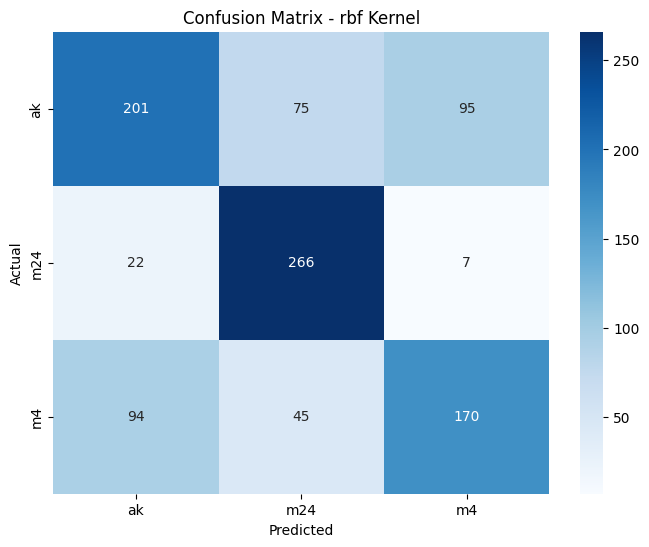

--------------------------------------------------
Training with poly kernel...
Accuracy for poly kernel: 0.59
Classification Report for poly kernel:
              precision    recall  f1-score   support

          ak       0.53      0.49      0.51       371
         m24       0.64      0.88      0.74       295
          m4       0.57      0.42      0.48       309

    accuracy                           0.59       975
   macro avg       0.58      0.60      0.58       975
weighted avg       0.58      0.59      0.57       975



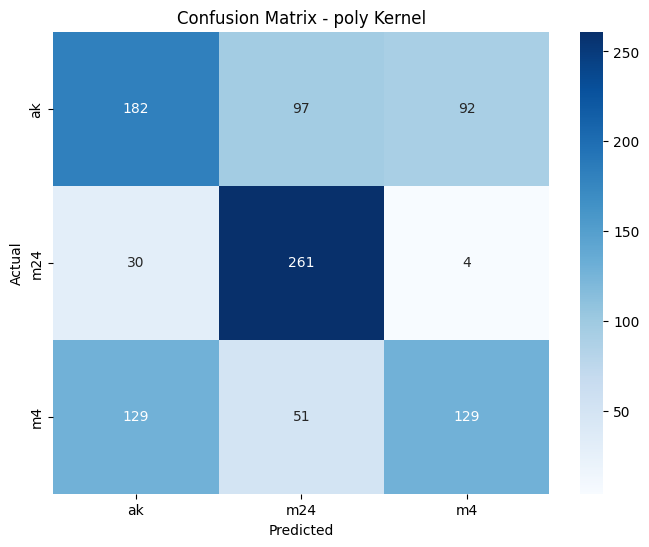

--------------------------------------------------


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = '/content/drive/MyDrive/sevenlumi_data/data_to_fed/cleaned_features.csv'
df = pd.read_csv(path)

# Drop unwanted columns
df = df.drop(['Arrival_Time_Difference', 'Gunshot', 'Mic'], axis=1)  # Drop the 'Mic' column

# Clean non-numeric values in the Distance column (if any)
df['Distance'] = df['Distance'].str.replace('m', '', regex=False).astype(float)

# Label Encoding for categorical target (Gun_Type)
label_encoder = LabelEncoder()
df['Gun_Type'] = label_encoder.fit_transform(df['Gun_Type'])

# Features and Labels
X = df.drop('Gun_Type', axis=1)  # Features
y = df['Gun_Type']  # Label

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of kernels to try
kernels = ['linear', 'rbf', 'poly']

# Iterate through kernels and train the model
for kernel in kernels:
    print(f"Training with {kernel} kernel...")

    # Model with specified kernel
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {kernel} kernel: {accuracy:.2f}")

    print(f"Classification Report for {kernel} kernel:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {kernel} Kernel')
    plt.show()

    print("-" * 50)


In [5]:
import joblib

# Specify the directory to save the model
model_directory = '/content/drive/MyDrive/sevenlumi_data/models/'

# Define the full path for saving the model
model_filename = model_directory + 'svm_model_linear_kernel.joblib'

# Save the trained model
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as /content/drive/MyDrive/sevenlumi_data/models/svm_model_linear_kernel.joblib
